In [1]:
import sys
sys.path.append("..")

from src.data.datasets.melody_dataset import MelodyDataset
from src.data.loaders.melody_loader import get_dataloader
from src.data.structures.sample import Sample

In [45]:
train_dataset = MelodyDataset.from_path("..\\datasets\\melody_extraction\\processed\\train")

Slicing audio and melody: 100%|██████████| 103/103 [00:06<00:00, 14.85it/s]


In [46]:
print(len(train_dataset.sliced_audio))
print(len(train_dataset.sliced_melody))

1233
1233


Длительность аудио: 7.4996825396825395
Длительность мелодии: 7.5


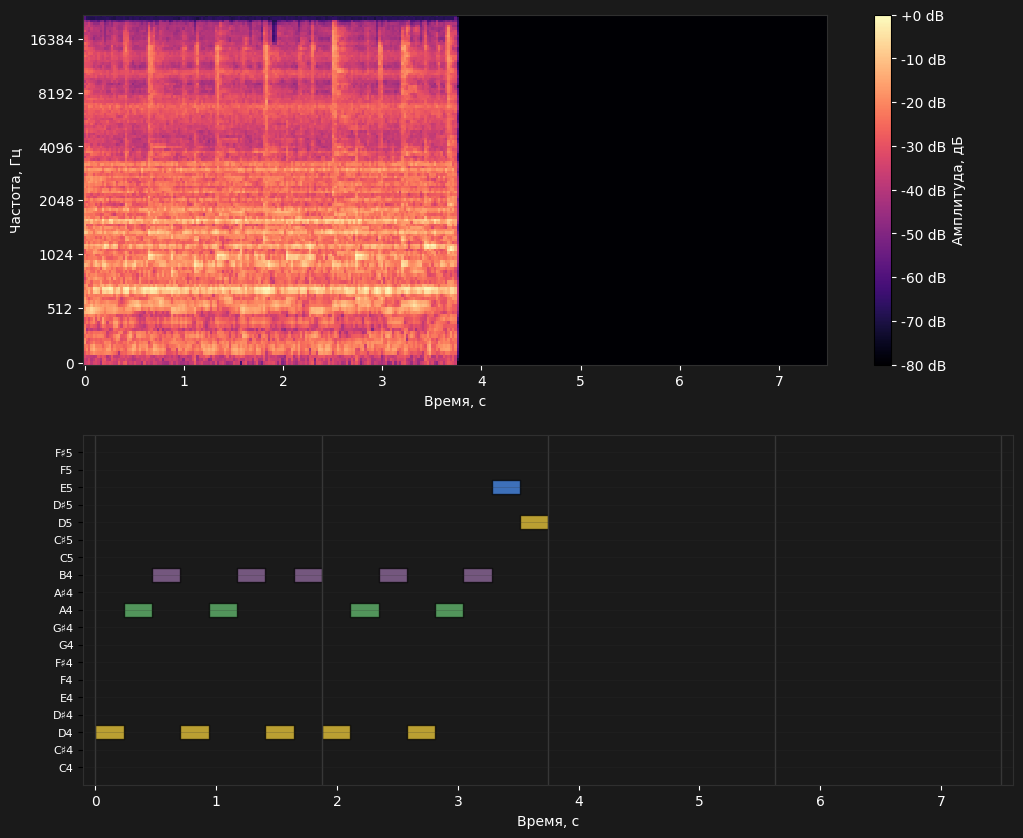

In [53]:
idx = 0
audio = train_dataset.sliced_audio[idx]
melody = train_dataset.sliced_melody[idx]

sample = Sample(audio, melody)
sample.visualize_with_spectrogram()

print(f"Длительность аудио: {audio.duration}")
print(f"Длительность мелодии: {melody.duration}")

In [23]:
train_loader = get_dataloader(train_dataset, batch_size=32, num_workers=0, shuffle=False)
data = next(iter(train_loader))

spectrograms = data[0]
freqs = data[1]
durations = data[2]
len_seqs = data[3]

In [24]:
spectrograms.shape

torch.Size([9, 1, 128, 256])

In [25]:
freqs.shape

torch.Size([9, 30])

In [26]:
durations.shape

torch.Size([9, 30])

In [27]:
len_seqs.shape

torch.Size([9, 1])

In [28]:
freqs[idx]

tensor([   0.5335,    0.0000,    0.5335,    0.5335,    0.5335,    0.0000,
        -100.0000, -100.0000, -100.0000, -100.0000, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000, -100.0000, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000, -100.0000, -100.0000, -100.0000,
        -100.0000, -100.0000, -100.0000, -100.0000, -100.0000, -100.0000])

In [29]:
durations[idx]

tensor([ 4.7619e-02,  4.7619e-02,  4.7619e-02,  1.5873e-02,  1.5873e-02,
         6.1905e-01, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02])

In [30]:
len_seqs

tensor([[0.4444],
        [0.3968],
        [0.4603],
        [0.3651],
        [0.2698],
        [0.1746],
        [0.2540],
        [0.0794],
        [0.1905]])

In [31]:
from src.nn.models.MelodyNet import MelodyNet

model = MelodyNet()

freqs, durations, seq_len = model.forward(spectrograms)

In [32]:
freqs.shape

torch.Size([9, 64])

In [33]:
freqs

tensor([[0.3607, 0.5745, 0.7192, 0.5631, 0.5823, 0.7512, 0.5644, 0.3187, 0.4456,
         0.3899, 0.6182, 0.4920, 0.4889, 0.4572, 0.4336, 0.6585, 0.4620, 0.4365,
         0.2997, 0.5389, 0.6441, 0.5557, 0.3691, 0.2552, 0.4849, 0.4432, 0.7087,
         0.3221, 0.5495, 0.3628, 0.4593, 0.3508, 0.5378, 0.4923, 0.4598, 0.7008,
         0.4697, 0.7730, 0.7095, 0.6074, 0.4304, 0.7803, 0.3800, 0.4257, 0.4274,
         0.6133, 0.5315, 0.5965, 0.6316, 0.5969, 0.3254, 0.6926, 0.4288, 0.5449,
         0.3386, 0.6171, 0.3646, 0.5021, 0.6128, 0.5325, 0.6361, 0.3655, 0.2429,
         0.4590],
        [0.4178, 0.4993, 0.7388, 0.5074, 0.5949, 0.7652, 0.6156, 0.3616, 0.4064,
         0.3624, 0.6413, 0.5019, 0.4213, 0.3967, 0.4015, 0.6862, 0.3960, 0.4732,
         0.3704, 0.5959, 0.6565, 0.4646, 0.3705, 0.2785, 0.5594, 0.3994, 0.6908,
         0.3502, 0.5912, 0.3835, 0.5018, 0.4345, 0.5588, 0.5135, 0.5028, 0.6902,
         0.5489, 0.7611, 0.6168, 0.5975, 0.4743, 0.7802, 0.3605, 0.5121, 0.3824,
         0

In [34]:
durations.shape

torch.Size([9, 64])

In [35]:
durations

tensor([[0.6266, 0.4947, 0.3118, 0.4210, 0.4134, 0.4411, 0.6040, 0.6674, 0.3783,
         0.2711, 0.5593, 0.4930, 0.6379, 0.3628, 0.5516, 0.6614, 0.5749, 0.6091,
         0.4654, 0.6011, 0.6086, 0.5615, 0.5016, 0.4250, 0.5301, 0.3794, 0.4697,
         0.6702, 0.3466, 0.5295, 0.4293, 0.5898, 0.6498, 0.7521, 0.7340, 0.3449,
         0.5742, 0.2594, 0.6180, 0.5983, 0.3787, 0.4192, 0.3344, 0.3475, 0.4012,
         0.4712, 0.4995, 0.4948, 0.4604, 0.5171, 0.2843, 0.3160, 0.4713, 0.4040,
         0.5118, 0.4750, 0.7252, 0.6331, 0.3873, 0.6080, 0.4878, 0.4206, 0.3540,
         0.5524],
        [0.6144, 0.5316, 0.3529, 0.4316, 0.4131, 0.3647, 0.6018, 0.6307, 0.4558,
         0.2196, 0.5648, 0.5357, 0.6763, 0.3442, 0.5598, 0.5998, 0.5951, 0.6453,
         0.4319, 0.6211, 0.5655, 0.5915, 0.4711, 0.4629, 0.4642, 0.4109, 0.5136,
         0.6662, 0.3556, 0.5002, 0.3888, 0.5717, 0.6739, 0.6825, 0.7482, 0.2849,
         0.5820, 0.3121, 0.6423, 0.6082, 0.3229, 0.4250, 0.3211, 0.3730, 0.3592,
         0

In [36]:
len_seqs.shape

torch.Size([9, 1])

In [37]:
len_seqs

tensor([[0.4444],
        [0.3968],
        [0.4603],
        [0.3651],
        [0.2698],
        [0.1746],
        [0.2540],
        [0.0794],
        [0.1905]])